In [1]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler,  OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from joblib import dump

# fetch dataset 
obesidad = fetch_ucirepo(id=544) 
  
# data (as pandas dataframes) 
X = obesidad.data.features 
y = obesidad.data.targets 

# ver tipos de datos
X.dtypes

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
dtype: object

In [2]:
X.head(5)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation


In [3]:
y.head(5)

,NObeyesdad
0,Normal_Weight
1,Normal_Weight
2,Normal_Weight
3,Overweight_Level_I
4,Overweight_Level_II


In [4]:
Data=pd.concat([X,y],axis=1) 

In [5]:
def describir_dataframe(df):
    """
    Función para describir detalladamente un DataFrame.

    Args:
        df (pandas.DataFrame): El DataFrame a describir.

    Returns:
        None
    """

    print("Resumen general del DataFrame:")
    print(df.info())

    print("\nEstadísticas descriptivas de las columnas numéricas:")
    print(df.describe())

    print("\nValores únicos y conteo por columna:")
    for col in df.columns:
        print(f"\nColumna: {col}")
        print(f"Valores únicos: {df[col].nunique()}")
        print(f"Tipos de datos: {df[col].dtype}")
        if df[col].dtype == 'object':
            print(f"Valores únicos (categorías):\n{df[col].value_counts(dropna=False)}")
        elif df[col].dtype in ['int64', 'float64']:
            print(f"Valores nulos: {df[col].isnull().sum()}")
            print(f"Valores mínimos: {df[col].min()}")
            print(f"Valores máximos: {df[col].max()}")
            print(f"Media: {df[col].mean()}")
            print(f"Mediana: {df[col].median()}")
            print(f"Desviación estándar: {df[col].std()}")
    for col in df.select_dtypes(include=['number']):
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        outliers = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)]
        print(f"Valores atípicos en {col}: {outliers.shape[0]}")
    for col in df.columns:
        if df[col].dtype in ['int64', 'float64']:
            # Si la variable es numérica, crea un histograma
            plt.figure(figsize=(8, 4))
            sns.histplot(data=df, x=col, kde=True)
            plt.title(f"Distribución de {col}")
            plt.show()
        else:
            # Si la variable es categórica, crea un gráfico de conteo
            plt.figure(figsize=(8, 4))
            sns.countplot(data=df, x=col)
            plt.title(f"Conteo de valores en {col}")
            plt.xticks(rotation=45)  # Rotar las etiquetas del eje x si es necesario
            plt.show()

Resumen general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF

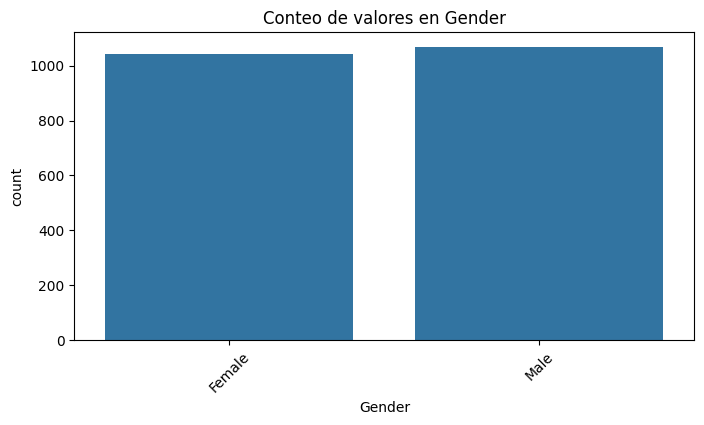

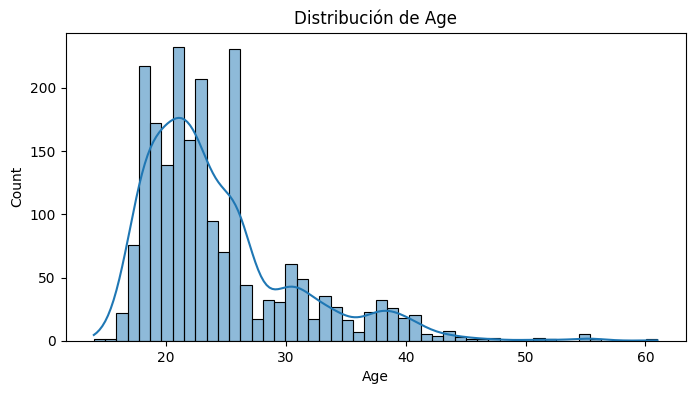

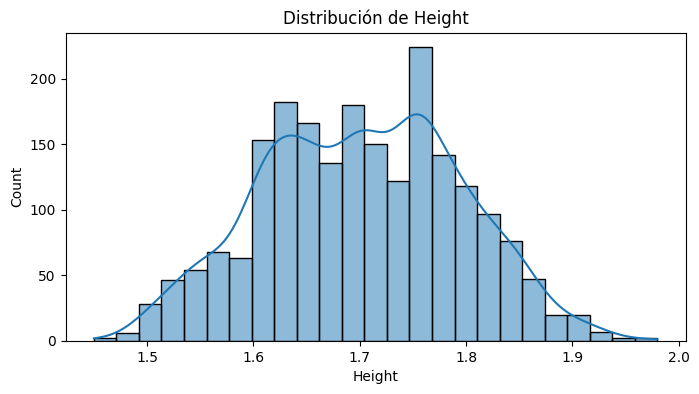

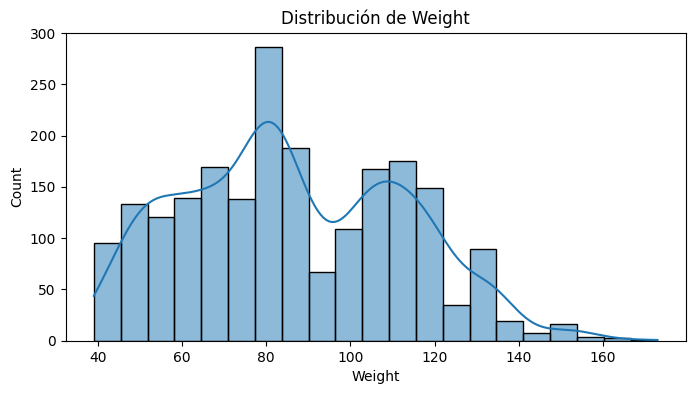

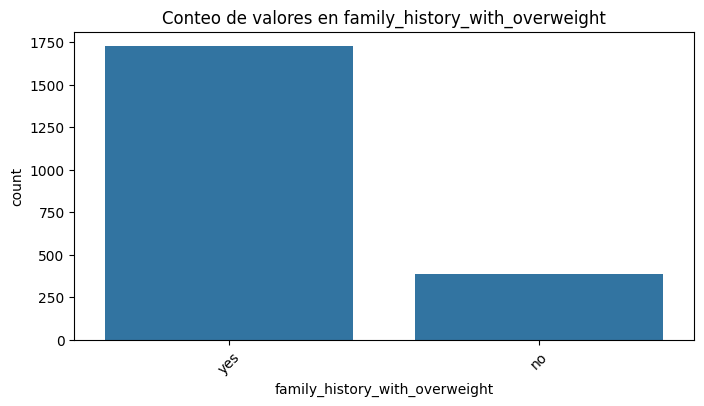

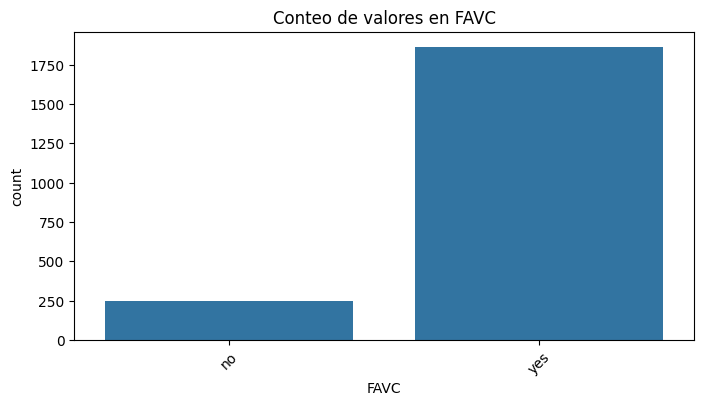

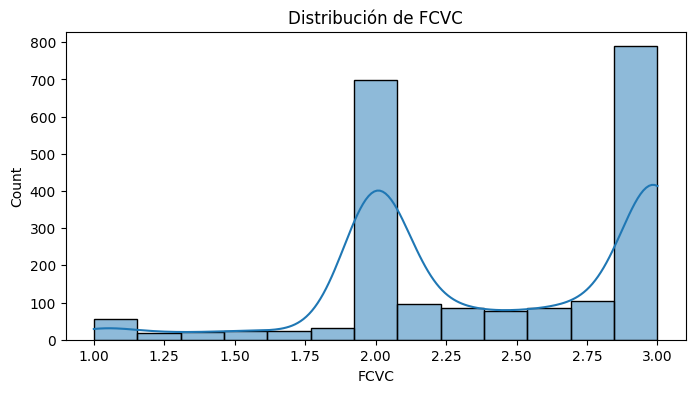

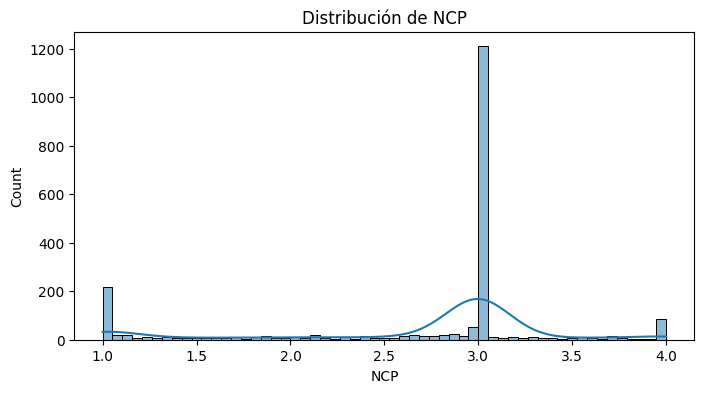

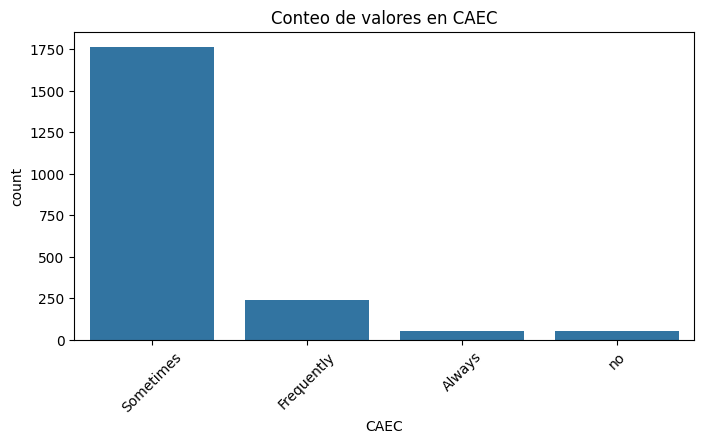

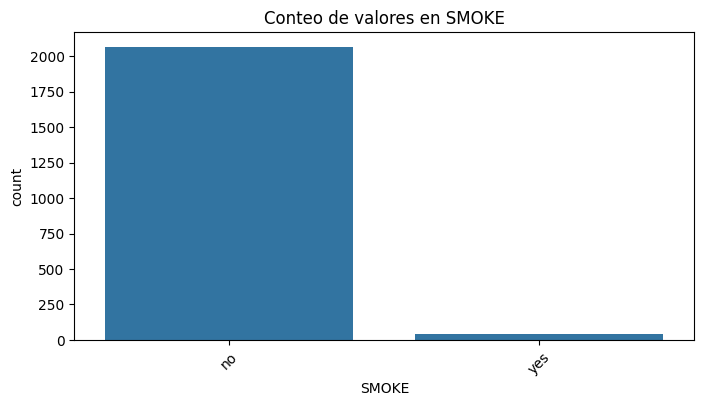

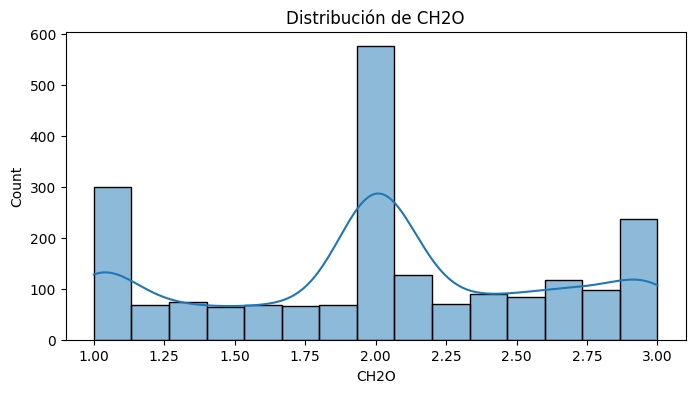

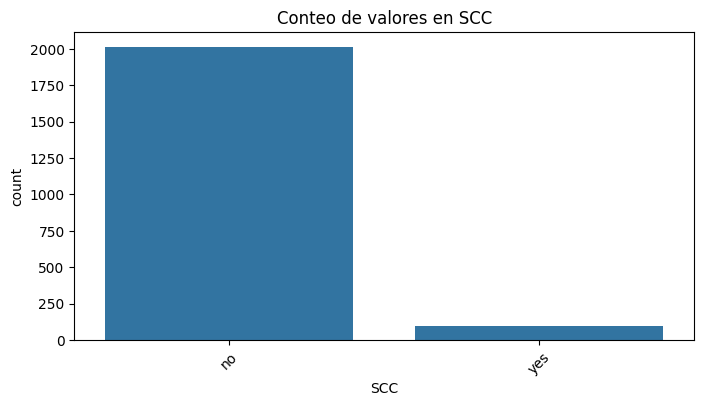

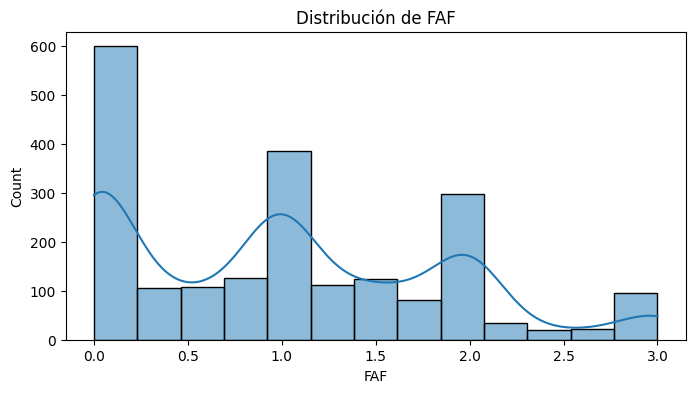

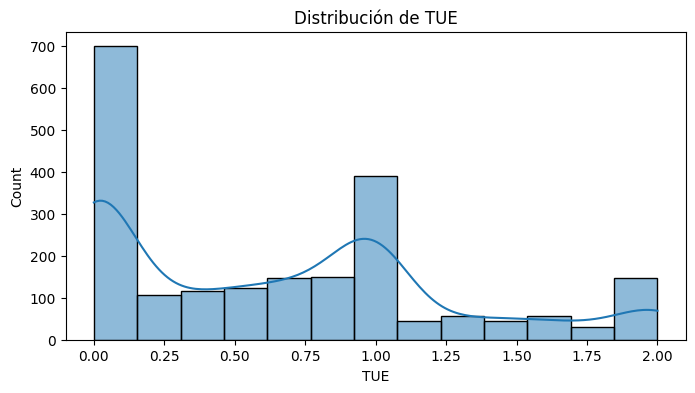

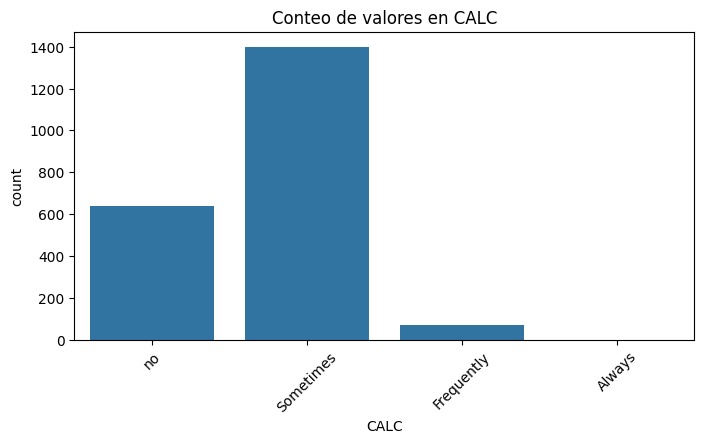

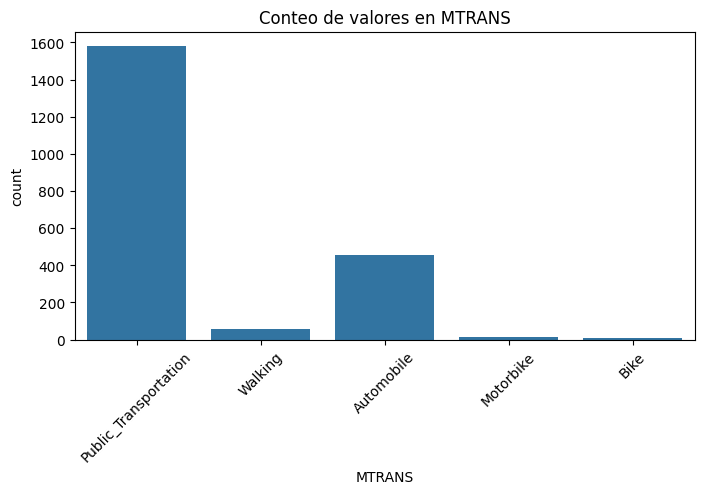

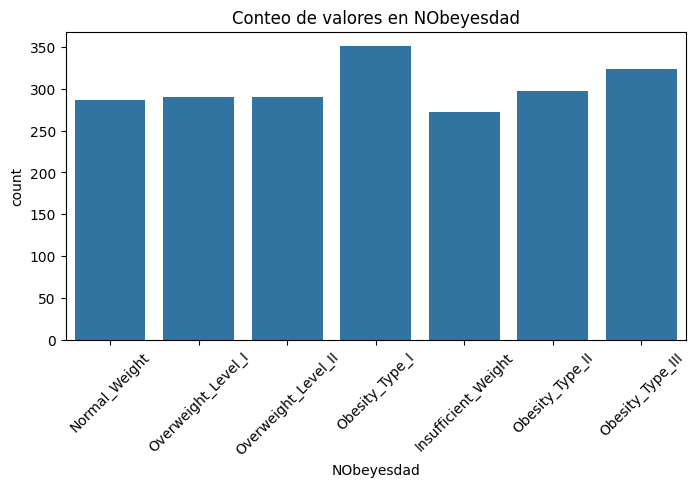

In [6]:
describir_dataframe(Data)

In [7]:
Data.to_csv('../Datos/data_obesity.csv',index=False)